Logistic Regression is widely used to predict binary outcomes
for a given set of independent variables.

A binary dependent variable can have only two values such as 
0 or 1, win or lose, pass or fail, healthy or sick.


egs: bank loan (yes or no),spam(spam or not spam),result(pass or fail)

real life scenarios: Cancer Prediction
Malignant (cancerous) and Benign (non-cancerous)


The probability distribution of output y is restricted to 1 or 0. 
This is called as sigmoid probability (σ)


If σ (θTx) > 0.5, set y = 1, else set y = 0.

Unlike Linear Regression ( and its Normal Equation solution ), 
there is no closed form solution for finding optimal 
weights of Logistic Regression.
Instead, you must solve this with maximum likelihood 
estimation ( a probability model to detect maximum 
likelihood of something happening ).

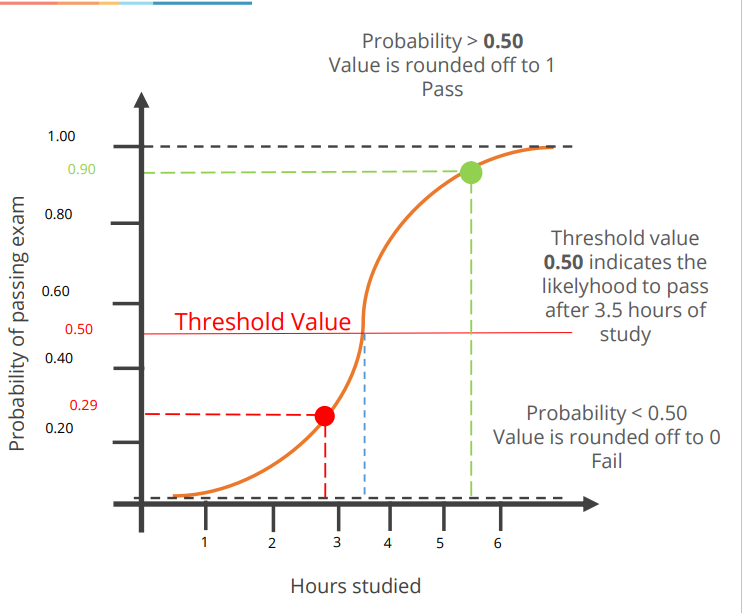

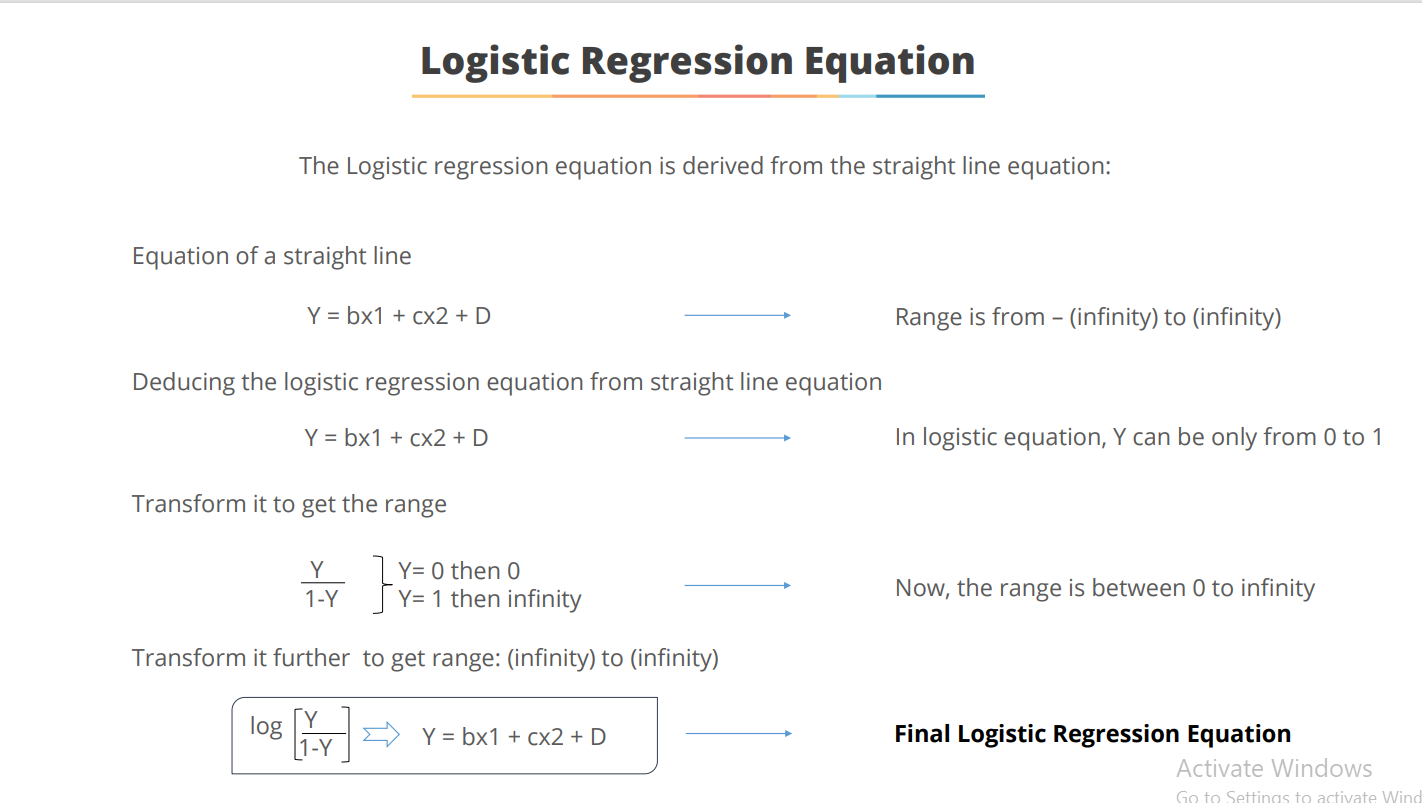

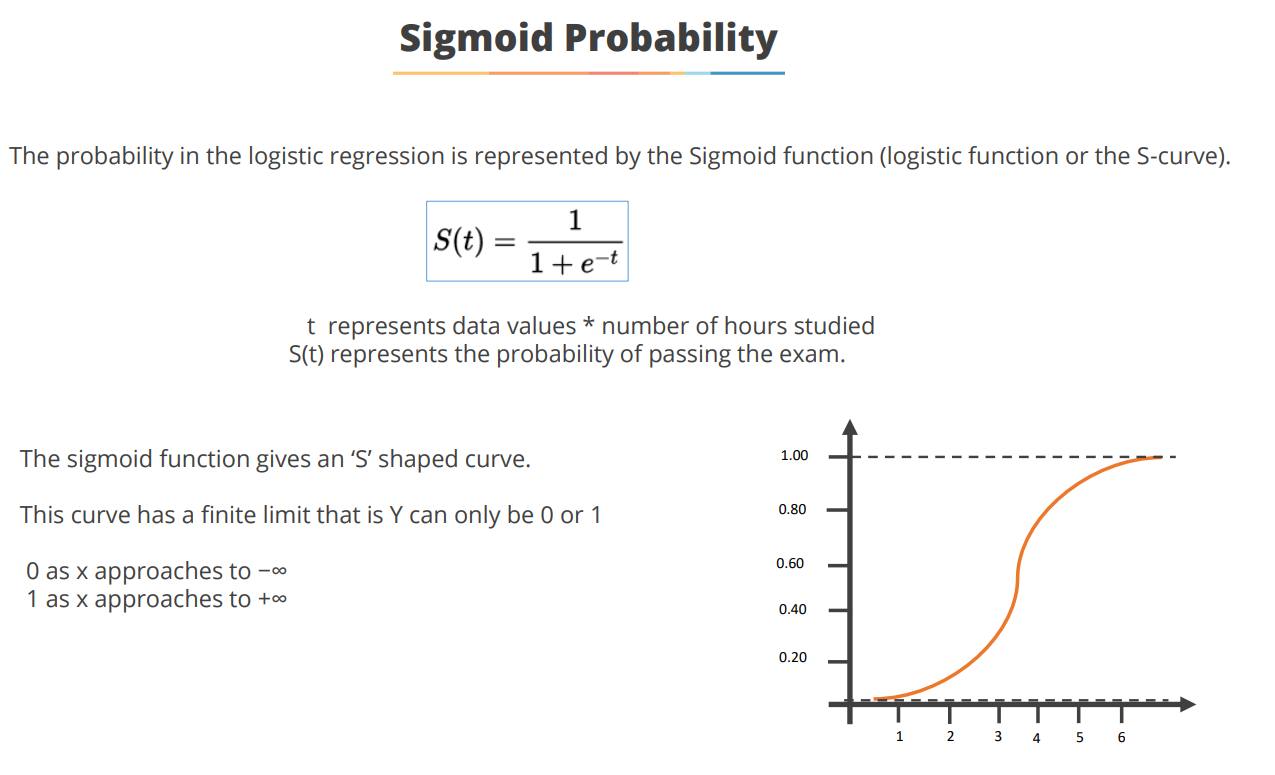

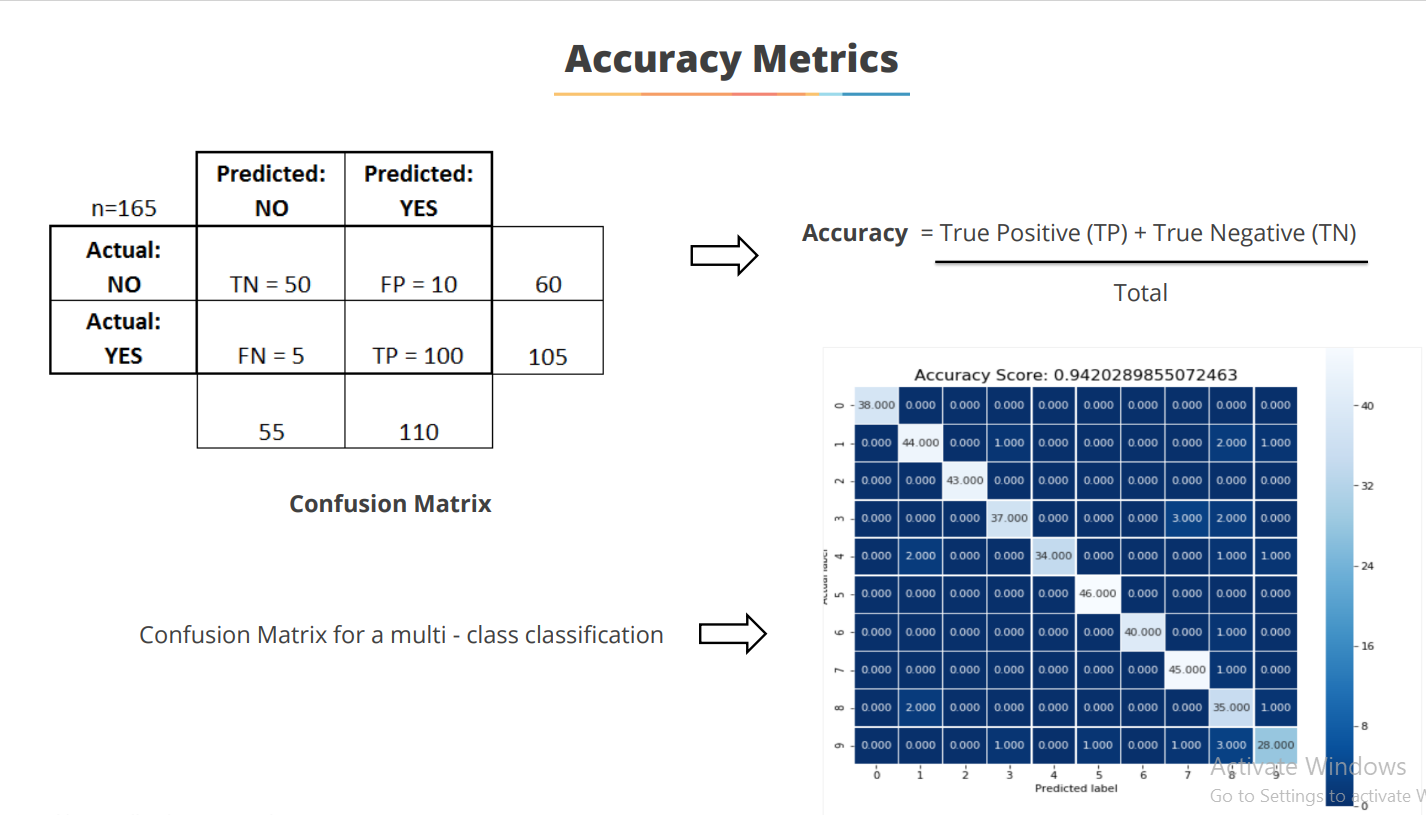

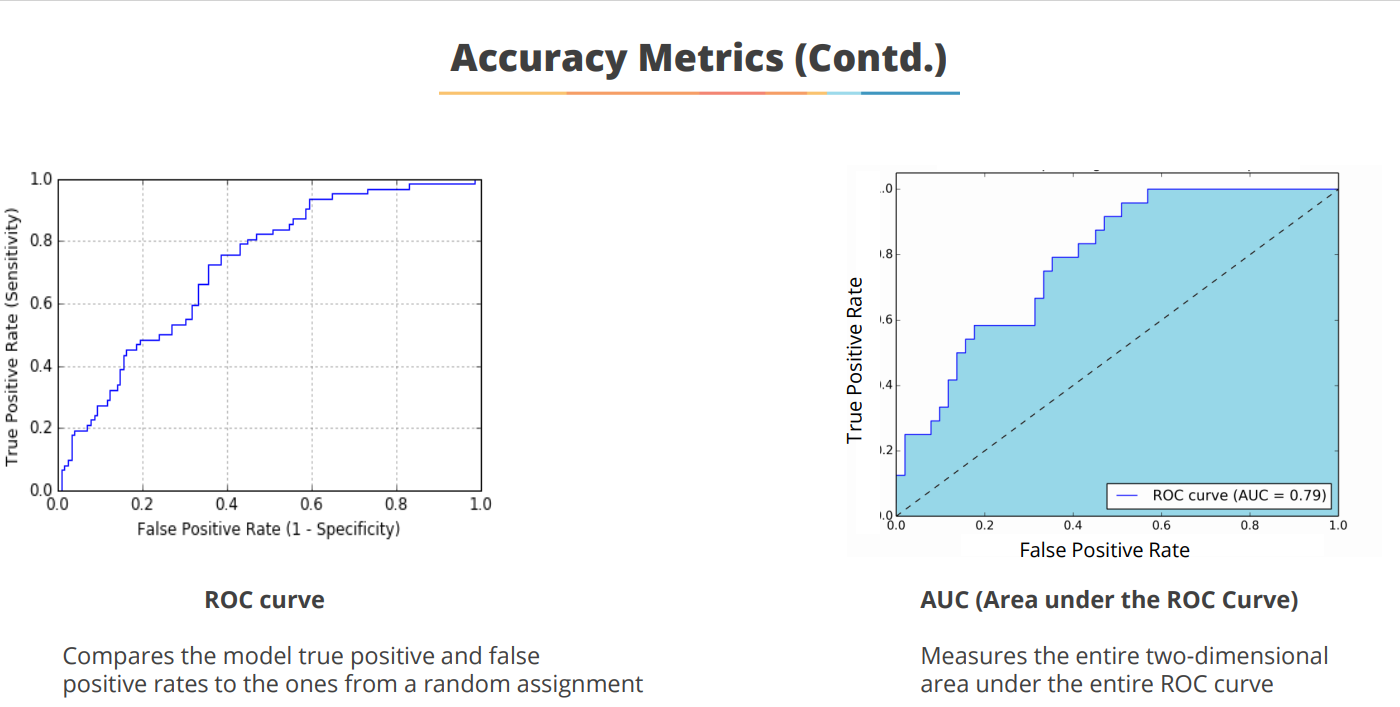

### Problem Statement : The sinking of the Titanic is one of the biggest maritime disaster in the history, killing 1502 out of 2224 passengers and the crew. One of the reasons for such loss was that there were not enough lifeboats. Some groups of people were more likely to survive than others, such as women, children, and the upper-class.


#### Objective : Use logistic regression to predict the survival of a given passenger based on features, such as sex, age

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [2]:
df_train=pd.read_csv('titnc_train.csv')
df_train.shape

(891, 12)

In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# now we see that that cabin is almost 80% missing values so we drop that column

In [12]:
# dropping columns that do not tell much about the persons survivabilty
df_train=df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# for each null value this func will check the passenger class value and assign an age value according to avg of ages 
#in that pclass
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [19]:
df_train['Age']=df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [20]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
df_train.dropna(inplace=True)# removes row containg null values
df_train.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [24]:
# as sex and embarked are categorical so convert them as well
df_train_dummied=pd.get_dummies(df_train,columns=['Sex'])
df_train_dummied=pd.get_dummies(df_train_dummied,columns=['Embarked'])


In [25]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


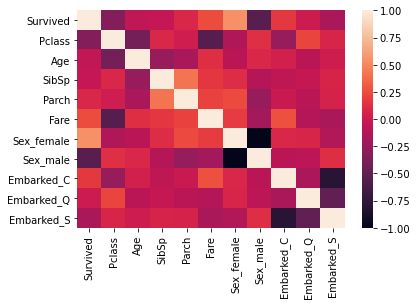

In [26]:
sns.heatmap(df_train_dummied.corr())# check correlation

In [28]:
used_features=['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
x=df_train_dummied[used_features].values
y=df_train_dummied['Survived']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(622, 9)
(267, 9)
(622,)
(267,)


In [31]:
logreg=LogisticRegression()


In [32]:
logreg.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred=logreg.predict(x_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)# accuracy of classification

print("confusion matrix : ",cm)
# outof 166 not survied,the classifier predicted 143 of them
# outof 101 of survied ,classifier predicted 79 of them

confusion matrix :  [[143  23]
 [ 22  79]]


In [36]:
ac = accuracy_score(y_test,y_pred)
print("accuracy score : ",ac)

accuracy score :  0.8314606741573034


In [37]:
len(x_test)# 166+101

267

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [39]:
logreg.coef_

array([[-1.03356685, -0.03953067, -0.23634829, -0.04638071,  1.19469622,
        -1.19826319,  0.34488252, -0.04201174, -0.30643776]])

In [40]:
logreg.intercept_

array([3.62482936])

In [41]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [42]:
logreg.predict_proba(x_test)# first col not surv,second col surv

array([[0.26447265, 0.73552735],
       [0.3957896 , 0.6042104 ],
       [0.94675036, 0.05324964],
       [0.26031682, 0.73968318],
       [0.94313366, 0.05686634],
       [0.13474979, 0.86525021],
       [0.33162709, 0.66837291],
       [0.51514654, 0.48485346],
       [0.78313029, 0.21686971],
       [0.40502038, 0.59497962],
       [0.74040888, 0.25959112],
       [0.21319474, 0.78680526],
       [0.74902045, 0.25097955],
       [0.14569733, 0.85430267],
       [0.8641561 , 0.1358439 ],
       [0.36755682, 0.63244318],
       [0.89358525, 0.10641475],
       [0.29635265, 0.70364735],
       [0.17616953, 0.82383047],
       [0.40259247, 0.59740753],
       [0.90426631, 0.09573369],
       [0.55406651, 0.44593349],
       [0.86337886, 0.13662114],
       [0.93642877, 0.06357123],
       [0.52012141, 0.47987859],
       [0.51255927, 0.48744073],
       [0.03984472, 0.96015528],
       [0.86873017, 0.13126983],
       [0.89712279, 0.10287721],
       [0.32561683, 0.67438317],
       [0.